<a href="https://colab.research.google.com/github/lschimidtc/house-pricing/blob/main/End_to_end_python_solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Libraries**


In [ ]:
# Data Manipulation
import pandas as pd
import numpy as np

# Graphics
import matplotlib.pyplot as plt
import seaborn as sns

# Warning
import warnings
warnings.filterwarnings('ignore')

# Pandas configuration
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 100)

# Matplotlib configuration
plt.rcParams['figure.figsize'] = (15, 6)
plt.style.use('seaborn-darkgrid')

#**Analysing the .csv**

In [ ]:
# What's the price for renting your house?

In [ ]:
# Data input
df = pd.read_csv('/content/house_data.csv')

# Dimension
df.shape

(10692, 13)

In [ ]:
# First peak
df.head(5)

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750,63,7973
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11,836


In [ ]:
# Removing columns
df.drop(columns = ['fire insurance (R$)', 'total (R$)'], inplace = True)
df.shape

(10692, 11)

In [ ]:
# Null cells
df.isnull().sum()

city                 0
area                 0
rooms                0
bathroom             0
parking spaces       0
floor                0
animal               0
furniture            0
hoa (R$)             0
rent amount (R$)     0
property tax (R$)    0
dtype: int64

In [ ]:
# Distinct elements
df.nunique()

city                    5
area                  517
rooms                  11
bathroom               10
parking spaces         11
floor                  35
animal                  2
furniture               2
hoa (R$)             1679
rent amount (R$)     1195
property tax (R$)    1243
dtype: int64

In [ ]:
# Column type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10692 entries, 0 to 10691
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   city               10692 non-null  object
 1   area               10692 non-null  int64 
 2   rooms              10692 non-null  int64 
 3   bathroom           10692 non-null  int64 
 4   parking spaces     10692 non-null  int64 
 5   floor              10692 non-null  object
 6   animal             10692 non-null  object
 7   furniture          10692 non-null  object
 8   hoa (R$)           10692 non-null  int64 
 9   rent amount (R$)   10692 non-null  int64 
 10  property tax (R$)  10692 non-null  int64 
dtypes: int64(7), object(4)
memory usage: 919.0+ KB


In [ ]:
df.dtypes.value_counts()

int64     7
object    4
dtype: int64

# **Exploratory Data Analysis (EDA)**

In [ ]:
# Filter columns
categorical_columns = df.columns[df.dtypes == object]
numerical_columns = df.columns[df.dtypes != object]

categorical_columns, numerical_columns

(Index(['city', 'floor', 'animal', 'furniture'], dtype='object'),
 Index(['area', 'rooms', 'bathroom', 'parking spaces', 'hoa (R$)',
        'rent amount (R$)', 'property tax (R$)'],
       dtype='object'))

In [ ]:
# Analysing objects
df['city'].value_counts(normalize = True) * 100

São Paulo         55.059858
Rio de Janeiro    14.038533
Belo Horizonte    11.765806
Porto Alegre      11.157875
Campinas           7.977927
Name: city, dtype: float64

In [ ]:
for column in categorical_columns:
  analysis = df[column].value_counts(normalize = True) * 100
  print(column, '\n', analysis, '\n')

city 
 São Paulo         55.059858
Rio de Janeiro    14.038533
Belo Horizonte    11.765806
Porto Alegre      11.157875
Campinas           7.977927
Name: city, dtype: float64 

floor 
 -      23.017209
1      10.110363
2       9.212495
3       8.707445
4       6.995885
5       5.611672
6       5.041152
7       4.648335
8       4.582866
9       3.451178
10      3.338945
11      2.833895
12      2.403666
13      1.870557
14      1.589974
15      1.374860
16      1.019454
17      0.897868
18      0.701459
19      0.495698
20      0.411523
21      0.392817
25      0.233820
23      0.233820
22      0.224467
26      0.187056
24      0.177703
27      0.074822
28      0.056117
29      0.046764
32      0.018706
35      0.009353
46      0.009353
301     0.009353
51      0.009353
Name: floor, dtype: float64 

animal 
 acept        77.777778
not acept    22.222222
Name: animal, dtype: float64 

furniture 
 not furnished    75.626637
furnished        24.373363
Name: furniture, dtype: float64 



In [ ]:
# Data correction

# Adjusting the floor
df.loc[df['floor'] == '301']
df.iloc[2562, 5] = 30

# Adjusting the "-" 
df['floor'] = df['floor'].apply(lambda Register: 0 if Register == '-' else Register)
df['floor'] = pd.to_numeric(df['floor'])

# Verification 
df.head(5)

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$)
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25


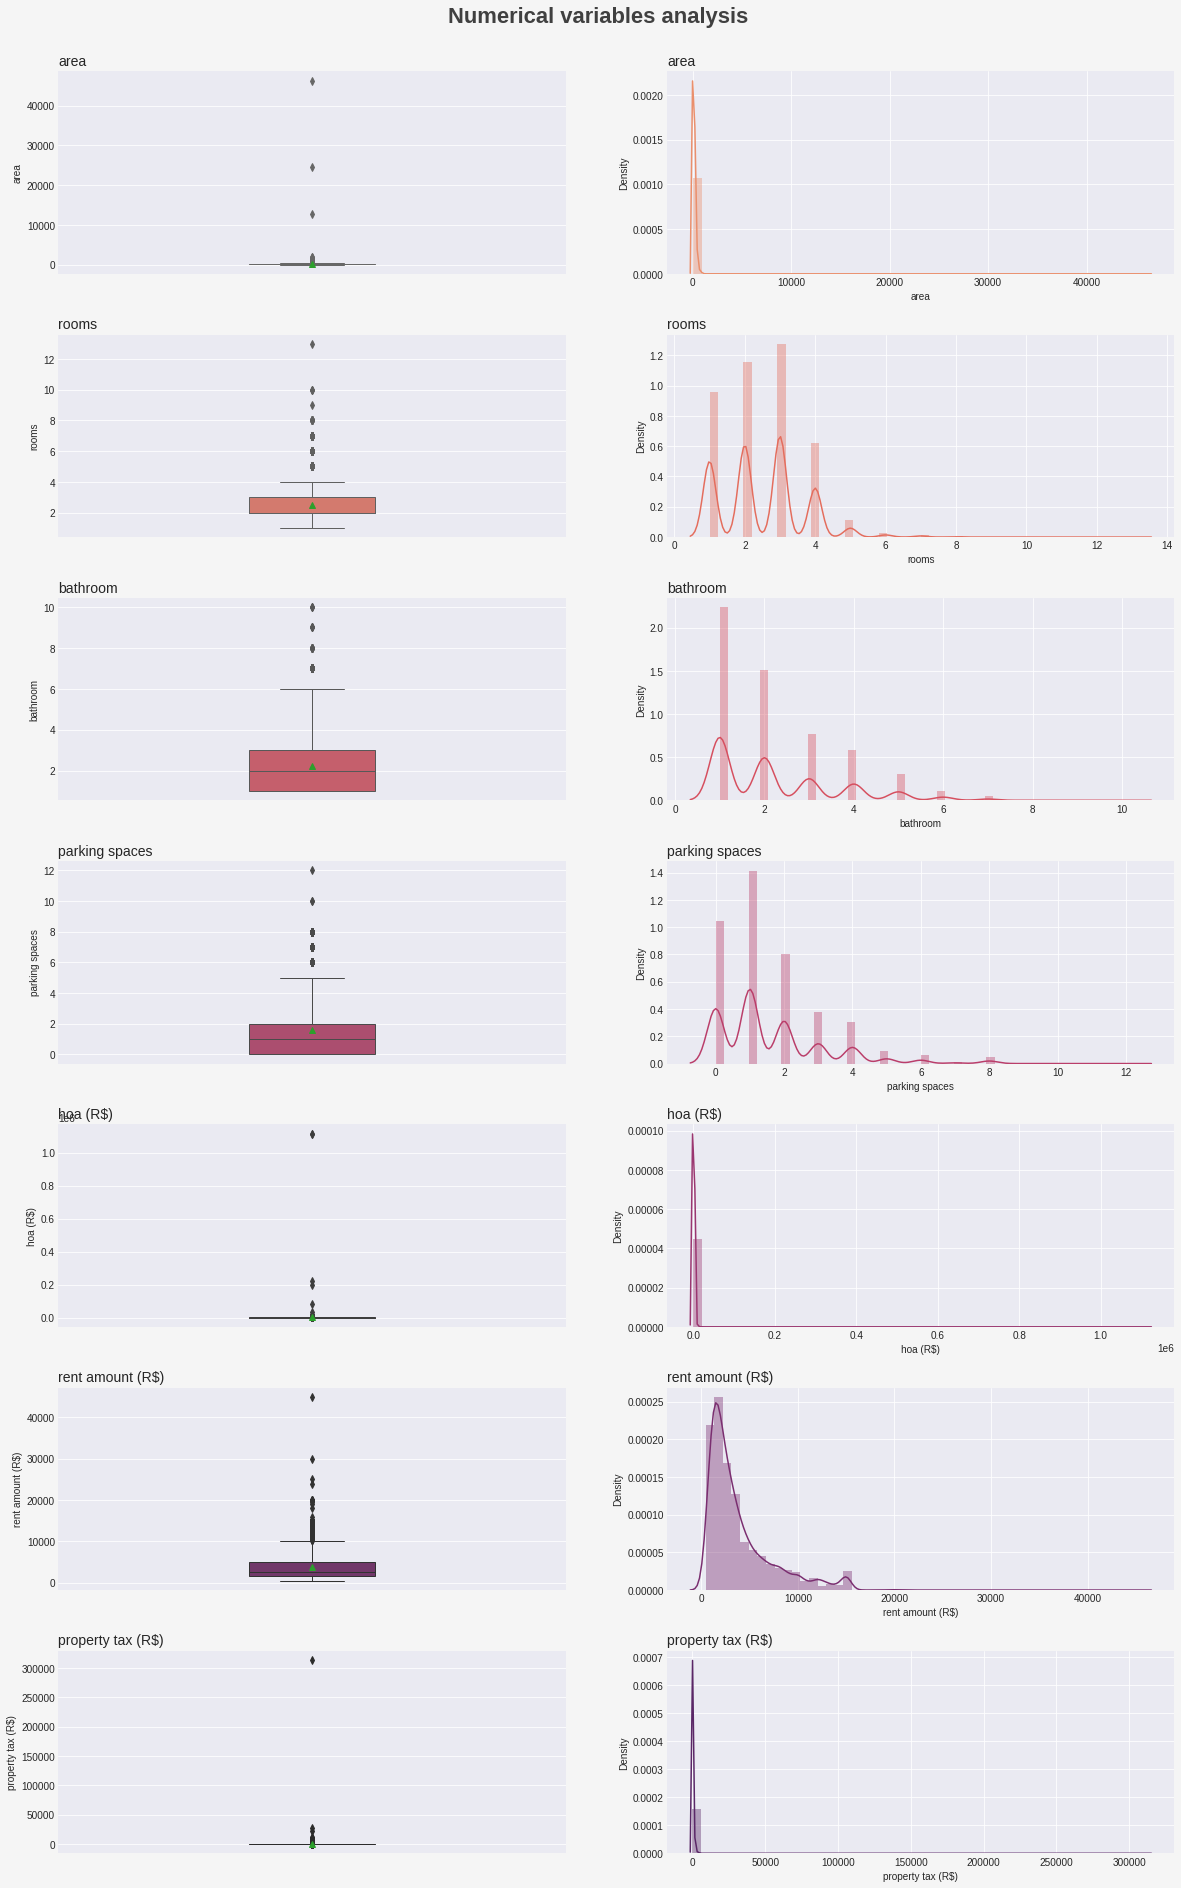

In [ ]:
# Grid - Graphs

# Sizing
figure, axis = plt.subplots(figsize = (20, 30))

# Background Color
background_color = '#f5f5f5'
figure.set_facecolor(background_color)

# Color palette
colorpalette = sns.color_palette('flare', len(numerical_columns) * 2)

# Title
plt.suptitle('Numerical variables analysis', fontsize = 22, color = '#404040', fontweight = 600)

# Structure
lines = 7 # (Todas as infos numericas)
columns = 2 #( Boxplot - Distplot)
position = 1 # Posicao inicial do grid

for column in numerical_columns:

  # Grid plot - Boxplot
  plt.subplot(lines, columns, position)
  
  # Title
  plt.title(f'{column}', loc = 'left', fontsize = 14, fontweight = 200)
  
  # Plot
  sns.boxplot(data = df, y = column, showmeans = True, saturation = 0.75, 
              linewidth = 1, color = colorpalette[position], width = 0.25 )
  
  # Change
  position += 1

  # Grid plot -- Distplot
  plt.subplot(lines, columns, position)

  # Title
  plt.title( f'{column}', loc = 'left', fontsize = 14, fontweight = 200 )

  # Plot
  sns.distplot(df[column], color = colorpalette[position - 1])

  # Change
  position += 1

  # Grid adjust
  plt.subplots_adjust(top = 0.95, hspace = 0.3)

# **Feature engineering**

In [ ]:
# Adjust the categorical columns